In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/beauty.csv', sep=';')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [5]:
type(df['wage'])
df['wage'].head()

0     5.73
1     4.28
2     7.96
3    11.57
4    11.42
Name: wage, dtype: float64

In [6]:
df.shape

(1260, 10)

In [7]:
df.columns

Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
wage        1260 non-null float64
exper       1260 non-null int64
union       1260 non-null int64
goodhlth    1260 non-null int64
black       1260 non-null int64
female      1260 non-null int64
married     1260 non-null int64
service     1260 non-null int64
educ        1260 non-null int64
looks       1260 non-null int64
dtypes: float64(1), int64(9)
memory usage: 98.5 KB


In [9]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


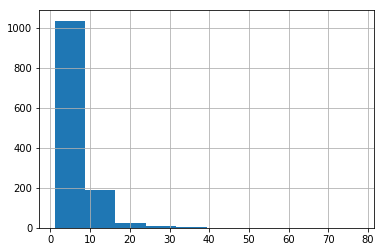

In [10]:
df['wage'].hist();

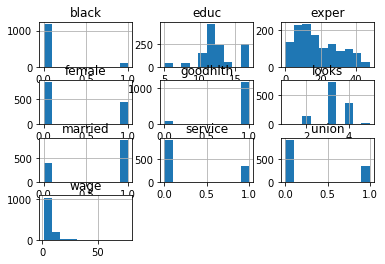

In [11]:
df.hist();

In [12]:
df['female'].nunique()

2

In [13]:
df['female'].value_counts()

0    824
1    436
Name: female, dtype: int64

Numeric - ordered, continious

Categoric - unordered, string

Ordinal - ordered, string

Binary - 0, 1, int, special type of categoric

In [14]:
df['looks'].value_counts()

3    722
4    364
2    142
5     19
1     13
Name: looks, dtype: int64

In [15]:
df['goodhlth'].value_counts(normalize=True)

1    0.933333
0    0.066667
Name: goodhlth, dtype: float64

### Indexing

#### .iloc(~Numpy Arrays)

In [16]:
df.iloc[0, 1]

30

In [17]:
df.iloc[:5, 0:2]

,wage,exper
0,5.73,30
1,4.28,28
2,7.96,35
3,11.57,38
4,11.42,27


In [18]:
toy_df = pd.DataFrame({'age': [15, 22, 32], 'salary': [0, 19, 43]}, index=['Kate', 'Helen', 'Mark'])
toy_df

,age,salary
Kate,15,0
Helen,22,19
Mark,32,43


In [19]:
toy_df.iloc[1,1]

19

### loc

In [20]:
toy_df.loc[['Helen', 'Mark'], 'age']

Helen    22
Mark     32
Name: age, dtype: int64

### boolean indexing

In [21]:
(df['wage'] > 40).sum()

2

In [22]:
df[(df['wage'] > 40) & (df['female']==1)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4


#### apply

'female'/'male'

In [23]:
def gender_id_to_str(gender_id):
    return 'female' if gender_id == 1 else 'male'

In [24]:
df['female'].apply(gender_id_to_str).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [25]:
df['female'].apply(lambda gender_id:
                  'female' if gender_id == 1 else 'male').head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

#### map

In [26]:
df['female'].map({0: 'male', 1: 'female'}).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

### GroupBy

In [27]:
df.loc[df['female'] == 0, 'wage'].median()

6.41

In [28]:
df.loc[df['female'] == 1, 'wage'].median()

3.75

In [29]:
df.groupby('female')

In [30]:
for (gender_id, sub_dataframe) in df.groupby('female'):
    print(gender_id)
    print(sub_dataframe.shape)
    
    print('Median wages for {} are {}'.format('men' if gender_id == 0
                                             else 'women',
                                             sub_dataframe['wage'].median()))

0
(824, 10)
Median wages for men are 6.41
1
(436, 10)
Median wages for women are 3.75


In [31]:
for (looks_id, sub_dataframe) in df.groupby('looks'):
    print(looks_id)
    print(sub_dataframe.shape)
    
    print('Median wages for looks={} are {}'.format(looks_id,
                                             sub_dataframe['wage'].median()))
    

1
(13, 10)
Median wages for looks=1 are 3.46
2
(142, 10)
Median wages for looks=2 are 4.595000000000001
3
(722, 10)
Median wages for looks=3 are 5.635
4
(364, 10)
Median wages for looks=4 are 5.24
5
(19, 10)
Median wages for looks=5 are 4.81


In [32]:
df.groupby(['female', 'married'])['wage'].median()

female  married
0       0          5.065
        1          6.710
1       0          3.890
        1          3.580
Name: wage, dtype: float64

In [37]:
x = pd.DataFrame(df.groupby(['female', 'married'])['wage'].median())
x

wage
female married       
0      0        5.065
       1        6.710
1      0        3.890
       1        3.580

#### crostab

In [31]:
pd.crosstab(df['female'], df['married'])

married,0,1
female,,
0,166,658
1,223,213


In [32]:
pd.crosstab(df['female'], df['looks'])

looks,1,2,3,4,5
female,,,,,
0,8,88,489,228,11
1,5,54,233,136,8


In [35]:
df['married'].value_counts()

1    871
0    389
Name: married, dtype: int64

In [46]:
pd.crosstab(df['married'], df['looks'], normalize='index').round(4)*100

looks,1,2,3,4,5
married,,,,,
0,1.29,10.54,52.70,32.65,2.83
1,0.92,11.60,59.36,27.21,0.92


In [47]:
import seaborn as sns

**wage/educ**

In [49]:
df['educ'].value_counts()

12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: educ, dtype: int64

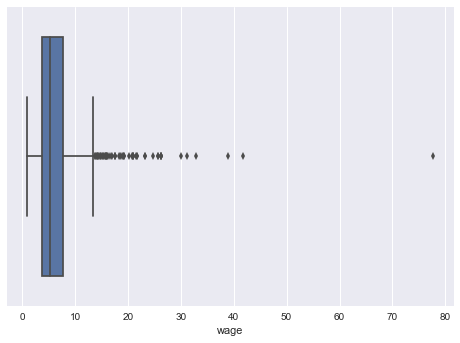

In [54]:
sns.boxplot(x='wage', data=df)

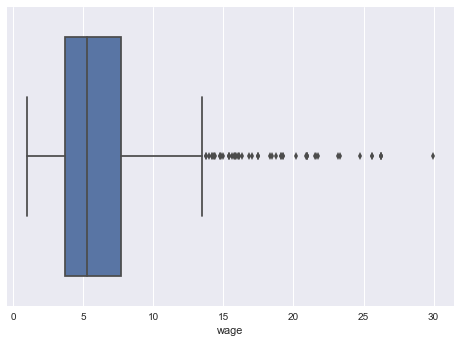

In [56]:
sns.boxplot(x='wage', data=df[df['wage']<30])

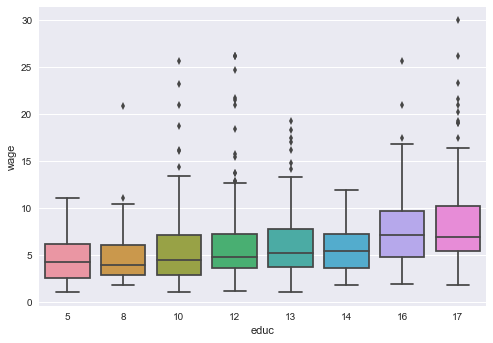

In [58]:
sns.boxplot(x=df['educ'], y='wage', data=df[df['wage']<30])

## Churn dataset

In [60]:
df2 = pd.read_csv('../../data/telecom_churn.csv')

In [63]:
df2.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [69]:
df2.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


In [72]:
df2[(df2['Churn']==0) & (df2['International plan']=='No')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False


In [87]:
df2.loc[:,'Total day calls':'Total night calls'].apply(np.max, axis=0) 

Total day calls        165.00
Total day charge        59.64
Total eve minutes      363.70
Total eve calls        170.00
Total eve charge        30.91
Total night minutes    395.00
Total night calls      175.00
dtype: float64

In [88]:
d = {'No':False, 'Yes':True}
df2['International plan'] = df2['International plan'].map(d)
df2.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [90]:
df2.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['State'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
State,,,
AK,95.269231,96.576923,97.346154
AL,99.100000,98.462500,98.612500
AR,102.145455,97.836364,99.054545
AZ,100.109375,102.406250,99.984375
CA,104.500000,103.088235,99.205882
CO,95.121212,98.166667,97.060606
CT,98.432432,99.121622,102.283784
DC,100.166667,101.981481,97.666667
DE,98.639344,97.360656,101.213115
